# **STAT 200 Project (100 points)**

#### **Sean Nguyen**


---

<br>

For your project, you must analyze data from the [COPDGene study](http://www.copdgene.org/) using the concepts covered in this course. Please follow the directions below carefully:

- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Comment all code using the `#`. This is a must!
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed project must be submitted to Canvas as a .ipynb file by the assigned due date**



<br>

---

<br>






## Data

Data for the project is available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv). A data dictionary describing the meaning of each of the variables in the dataset is available in the Project module in Canvas.

<br>

---

<br>






## Introduction

Chronic obstructive pulmonary disease (COPD) affects over 16 million Americans and is the fourth leading cause of death in the United States behind heart disease, cancer, and accidental death. While COPD can result from various toxic inhalations or asthma, it is most commonly associated with cigarette smoking. 

<br>

COPD severity is typically measured by a device called a spirometer. Patients forcefully exhale into the device and the volume of air exhaled is used as a measure for the severity of disease (less air exhaled $\Rightarrow$ worse disease). Data collected by the COPDGene research group includes spirometry data on thousands of research participants.

<br>

Spirometry measures in the dataset:
* The forced expiratory volume (`FEV1`) is the volume of air exhaled in 1 second
* The forced vital capacity (`FVC`) is the total volume of air exhaled after a full breath
* `FEV1_FVC_ratio` is the ratio between `FEV1` and `FVC` (smaller $\Rightarrow$ worse disease)
* `FEV1_phase2` is the `FEV1` of research participants 5 years later

<br>

You overall task in this project is to analyze the relationship between FEV1 at follow-up `FEV1_phase2` and other variables in the dataset. The project has been organized into a series of tasks to assist you with your analysis organization.

<br>

---

<br>






####<font color=red>Organized</font> (5 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1. 
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2. 
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1</font> (5 points)

1. Load the COPDGene dataset and show the first few lines.
2. Remove the NAs from the dataset and store as `dat1`. How many rows does `dat1` contain? Answer in a complete sentence.
3. Select all rows in the dataset where `FEV1_phase2` is `NA` and store as `dat2`. How many rows does `dat2` contain? Answer in a complete sentence.


In [ ]:
# 1. Load the data
# create url to copd data
copd_url <- url("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv")

# load the census data into memory
copd <- read.csv(copd_url)

# show first few lines
head(copd)

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
2,10006S,2008,1/15/2008,62.3,Female,White,162.6,86.0,170,80,⋯,5.2325,14.005900,-1.0000,-1.00000,-841.880,-1.000,0.43,1.288,3.022,NA
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924


In [ ]:
# 2. Remove NAs from dataset and store as dat1
dat1 <- na.omit(copd)
nrow(dat1)

[1] 4000

2. After removing NAs from the dataset, the dataset 'dat1' contains 4000 rows.

In [ ]:
# 3. Store rows where FEV1_phase2 is NA
dat2 <- copd[is.na(copd$FEV1_phase2),]
nrow(dat2)

[1] 1747

2. After storing rows from the dataset where 'FEV1_phase2' is NA, the dataset 'dat2' contains 1747 rows.

<br>

---

<br>






####<font color=red>Task 2</font> (10 points)

1. From `dat1`, plot the histogram of `FEV1`
2. Calculate the percentage of `FEV1` values within one standard deviation of its mean. Answer in a complete sentence.
3. Calculate the percentage of `FEV1` values within 2 standard deviations of its mean. Answer in a complete sentence.
4. Use your answers from 2.1-2.3 to determine if the FEV1 variable is approximately normally distributed.


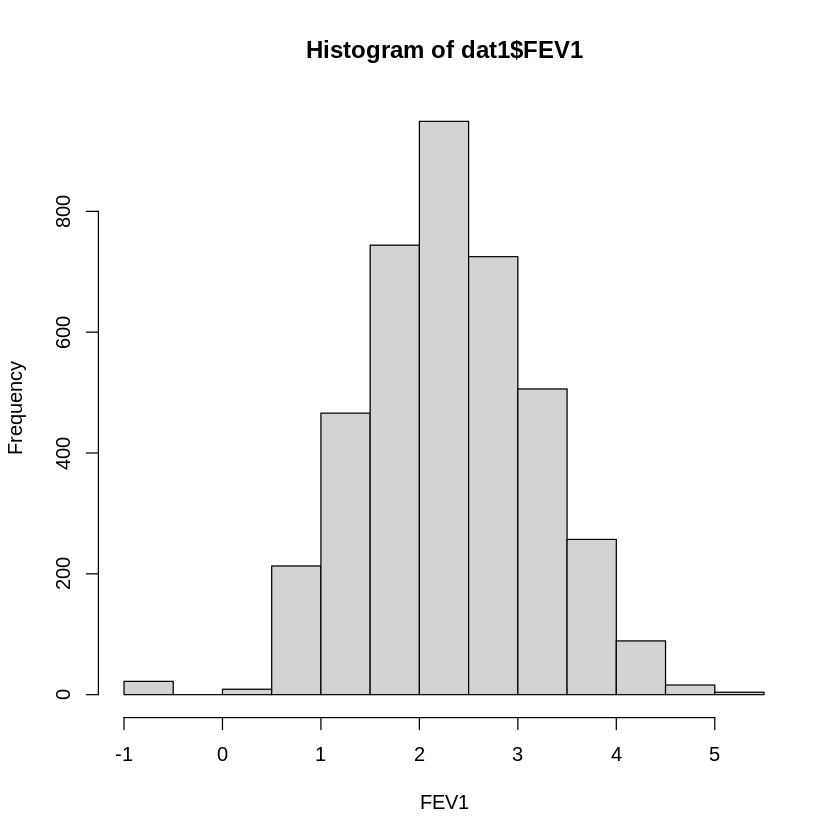

In [ ]:
# 1. Plot histogram of FEV1 using the dat1 dataframe
hist(dat1$FEV1, xlab="FEV1")

In [ ]:
# 2. Calculate percentage of values within one standard deviation of its mean
lowerInterval <- mean(dat1$FEV1) - sd(dat1$FEV1)
upperInterval <- mean(dat1$FEV1) + sd(dat1$FEV1)

nrow(dat1[dat1$FEV1 >= lowerInterval & dat1$FEV1 <= upperInterval,]) / nrow(dat1)

[1] 0.67575

2. Around 67.58% of the FEV1 values lie within one standard deviation of its mean.

In [ ]:
# 2. Calculate percentage of values within two standard deviation of its mean
lowerInterval2 <- mean(dat1$FEV1) - (2 * sd(dat1$FEV1))
upperInterval2 <- mean(dat1$FEV1) + (2 * sd(dat1$FEV1))

nrow(dat1[dat1$FEV1 >= lowerInterval2 & dat1$FEV1 <= upperInterval2,]) / nrow(dat1)

[1] 0.9675

3. Around 96.75% of the FEV1 values lie within two standard deviations of its mean.

4. FEV1 is approximately normally distributed. The histogram in 2.1 shows a symmetric bell-shaped curve. From the calculations in 2.2, we know that around 67.58% of the values lie within one standard deviation of the mean; this is very similar to a normal distribution, where 68% of the values lie within one standard deviation of the mean. Similarly, from 2.3, we know that around 96.7% of the values lie within two standard deviations of its mean. This is also much like the normal distribution, where 95% of the values lie within two standard deviations of the mean. Thus, FEV1 is approximately normally distributed.

<br>

---

<br>






####<font color=red>Task 3</font> (10 points)

1. From `dat1`, find two other numeric variables and plot their histograms.
2. Describe the histogram of the FIRST variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph
2. Describe the histogram of the SECOND variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph

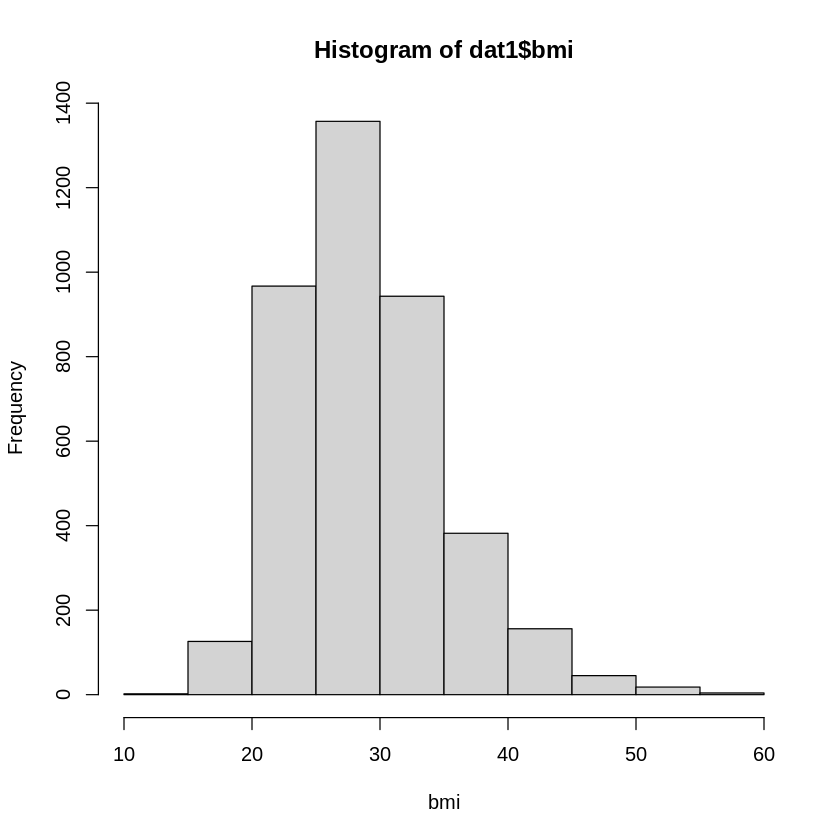

In [ ]:
# 1a. Plot histogram of bmi
hist(dat1$bmi, xlab="bmi")

In [ ]:
# Find range, standard deviation, mean
diff(range(dat1$bmi))
sd(dat1$bmi)
mean(dat1$bmi)

[1] 47.33

[1] 6.108815

[1] 29.07562

2. From the histogram, we can see that it seems to be close to a normal distribution, but there is a slight skewness rightwards. Thus, it is not symmetric, nor is it normally distributed. The mean is 29.07 and the standard deviation is 6.1. The maximum BMI is around 60, and the minimum is around 12.67; thus, the range is 47.33. There does not seem to be any notable outliers.

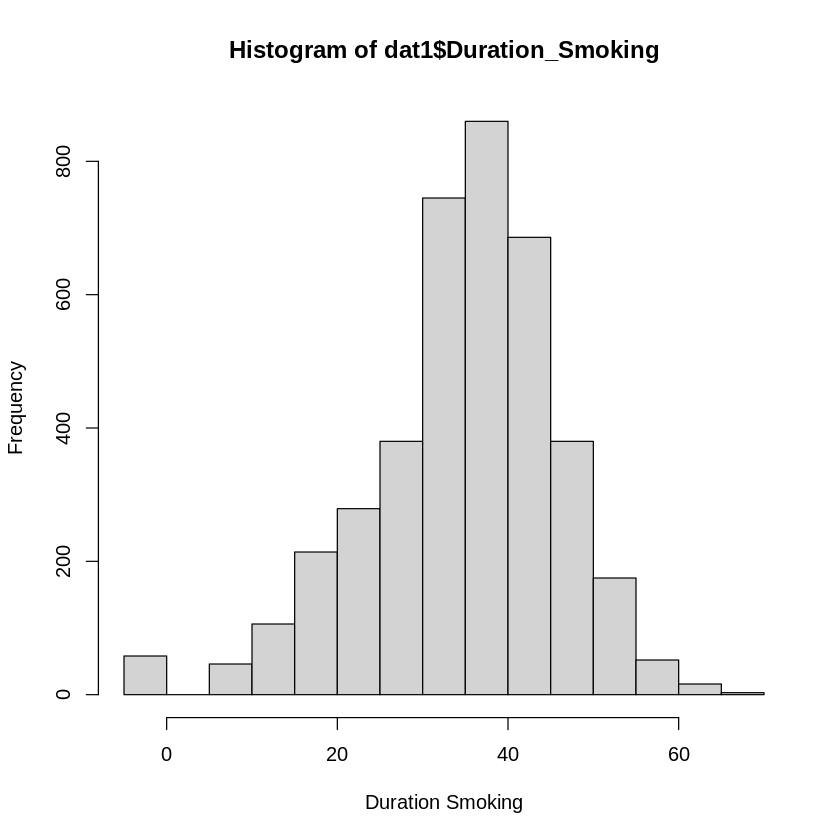

In [ ]:
# 1b. Plot histogram of Duration_Smoking
hist(dat1$Duration_Smoking, xlab="Duration Smoking")

[1] 68

[1] 10.9524

[1] 35.06956

[1] -1 67

[1] 6

[1] 61

[1] 35.60027

[1] 10.11393

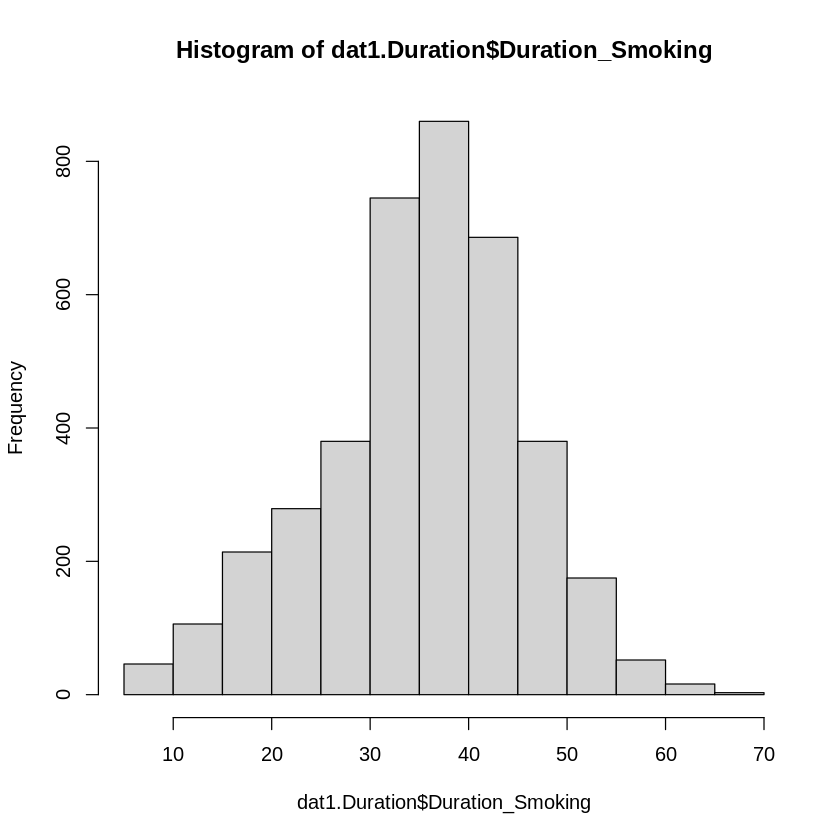

In [ ]:
# Find range, standard deviation, mean
diff(range(dat1$Duration_Smoking))
sd(dat1$Duration_Smoking)
mean(dat1$Duration_Smoking)
range(dat1$Duration_Smoking)

# Remove -1 values
dat1.Duration <- dat1[dat1$Duration_Smoking != -1,]
min(dat1.Duration$Duration_Smoking)
diff(range(dat1.Duration$Duration_Smoking))
mean(dat1.Duration$Duration_Smoking)
sd(dat1.Duration$Duration_Smoking)

hist(dat1.Duration$Duration_Smoking)

3. From the histogram, we can see that it is clearly skewed left. As a result, the distribution is not symmetric, nor is it normally distributed. The mean is 35.07 years and the standard deviation is 10.95 years. The maximum duration smoking is around 67 years, and the minimum is -1, indicating that they have never smoked. There are outliers at -1, but aside from that, there does not seem to be any outliers.

4. If we were to disregard the -1 values, the minimum would be around 6 years. The range disregarding the -1 values is 61 years, and the mean 35.6 years. The standard deviation changes to 10.11 years. The histogram is closer to symmetric, but still skewed.

<br>

---

<br>






####<font color=red>Task 4</font> (10 points)

1. Using `dat1`, create a boxplot to visualize the relationship between `FEV_phase2` and `smoking_status`.
2. Based on the boxplot, which group tends to have better breathing capacity?
3. Select rows in `dat1` corresponding to a `smoking_status` of `Current smoker` or `Former smoker`. Create a 95% confidence interval to determine if average FEV1_phase2 is different between current or former smokers. Explain your answer in complete sentences.

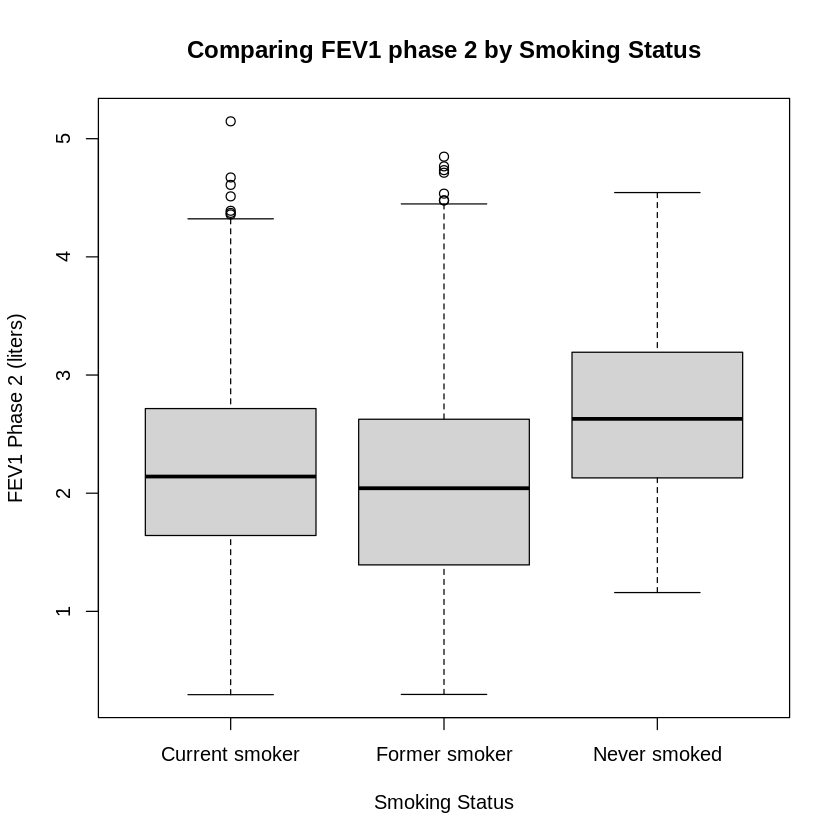

In [ ]:
# 1. Plot boxplot of FEV1_phase2 vs smoking_status
boxplot(dat1$FEV1_phase2~dat1$smoking_status, main='Comparing FEV1 phase 2 by Smoking Status', xlab='Smoking Status', ylab='FEV1 Phase 2 (liters)')

2. Based on the boxplot, those who have never smoked tend to have a better breathing capacity than both current smokers and former smokers.

In [ ]:
# 3. Create confidence interval for FEV1_phase2

# Subset data where smoking status is current or former
smokers <- dat1[dat1$smoking_status == 'Current smoker' | dat1$smoking_status == 'Former smoker',]

# Confidence interval
t.test(smokers$FEV1_phase2 ~ smokers$smoking_status)$conf.int

[1] 0.08155305 0.18408473
attr(,"conf.level")
[1] 0.95

3. From the 95% confidence interval, there is a 95% chance that the the true mean of FEV1 five years after for patients who currently smoke is greater than the true mean of FEV1 five years after for patients who formerly smoked by a volume that is between 0.1093 liters and 0.2177 liters. Thus, the average FEV1 five years after is very likely to be different between current and former smokers, as current smokers are more likely to have a higher FEV1 volume.

<br>

---

<br>






####<font color=red>Task 5</font> (10 points)

1. Using `dat1`, create two more boxplots to visualize the relationship between `FEV1_phase2` and two other categorical variables.
2. For the first variable, use a 95% confidence interval to determine if the average `FEV1_phase2` is different between two categories.
3. For the second variable, use a 95% confidence interval to determine if the average `FEV1_phase2` in phase 2 is different between two categories.

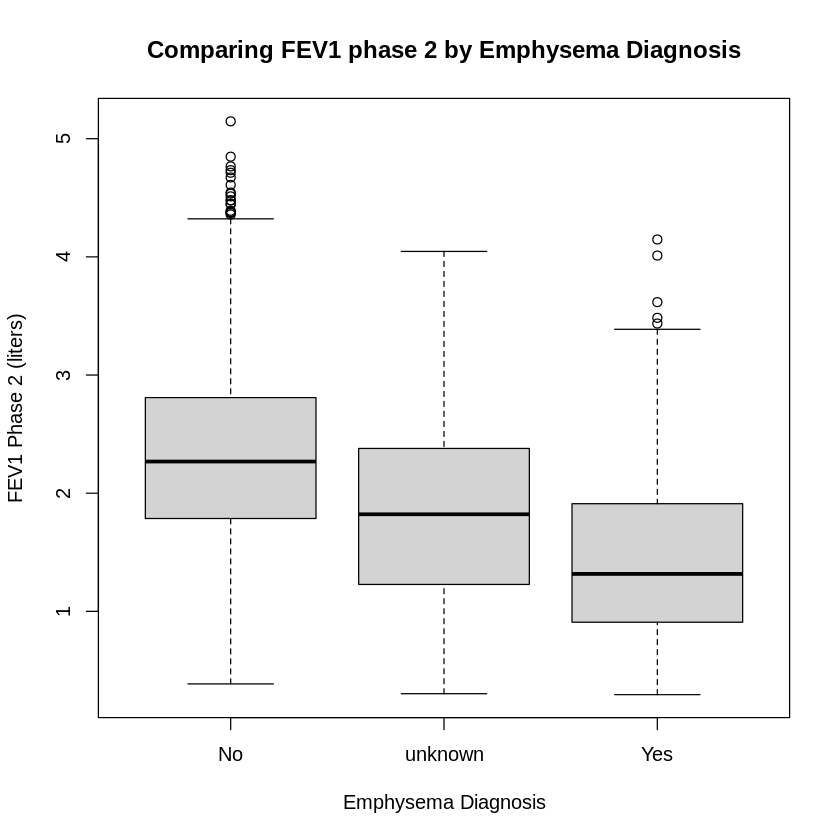

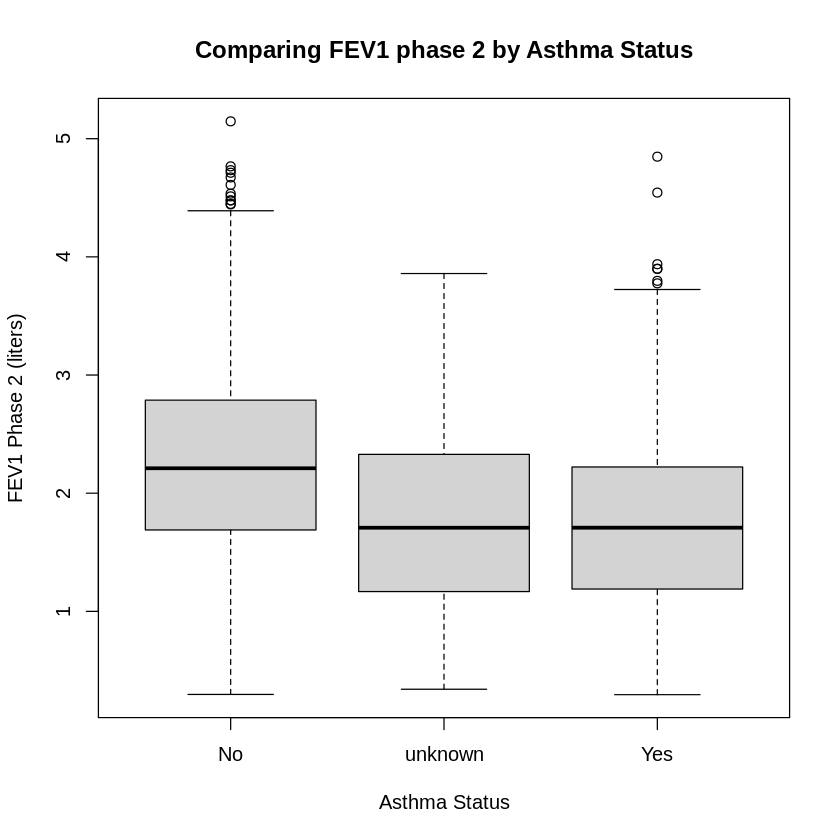

In [ ]:
# 1a. Plot boxplot of FEV1_phase2 vs emphysema
boxplot(dat1$FEV1_phase2 ~ dat1$emphysema, main='Comparing FEV1 phase 2 by Emphysema Diagnosis', xlab='Emphysema Diagnosis', ylab='FEV1 Phase 2 (liters)')

# 1b. Plot boxplot of FEV1_phase2 vs emphysema
boxplot(dat1$FEV1_phase2 ~ dat1$asthma, main='Comparing FEV1 phase 2 by Asthma Status', xlab='Asthma Status', ylab='FEV1 Phase 2 (liters)')

In [ ]:
# 2. Create confidence interval for FEV1 phase 2

# Subset data where emphysema diagnosis is 'Yes' or 'No'
emphysemaDiagnosis <- dat1[dat1$emphysema == 'Yes' | dat1$emphysema == 'No',]

# Confidence interval
t.test(emphysemaDiagnosis$FEV1_phase2 ~ emphysemaDiagnosis$emphysema)$conf.int

[1] 0.7907560 0.9077912
attr(,"conf.level")
[1] 0.95

3. From the 95% confidence interval, there is a 95% chance that the the true mean of FEV1 five years after for patients who have been diagnosed without emphysema is greater than the true mean of FEV1 five years after for patients who have been diagnosed as not having emphysema by a volume that is between 0.7908 liters and 0.9078 liters. Thus, the average FEV1 five years after is very likely to be different between those who have been diagnosed with emphysema and those who have been diagnosed as not having emphysema, as those who have been diagnosed as not having it are more likely to have a higher FEV1 volume.

In [ ]:
# 2. Create confidence interval for FEV1 phase 2

# Subset data where asthma status is 'Yes' or 'No'
asthmaStatus <- dat1[dat1$asthma == 'Yes' | dat1$asthma == 'No',]

# Confidence interval
t.test(asthmaStatus$FEV1_phase2 ~ asthmaStatus$asthma)$conf.int

[1] 0.4122503 0.5377226
attr(,"conf.level")
[1] 0.95

3. From the 95% confidence interval, there is a 95% chance that the the true mean of FEV1 five years after for patients have not had asthma is greater than the true mean of FEV1 five years after for patients who have had asthma by a volume that is between 0.4123 liters and 0.5377 liters. Thus, the average FEV1 five years after is very likely to be different between those who have had asthma and those who have not had asthma, as those who have not had asthma are more likely to have a higher FEV1 volume.

<br>

---

<br>






####<font color=red>Task 6</font> (20 points)

1. Using `dat1`, create a scatterplot visualizing the relationship between `FEV1_phase2` (y-axis) and `FEV1` (x-axis). Note that values that are -1 are missing observations. You may ignore this for this class.
2. What relationship do you observe based on the scatterplot?
3. Fit a simple linear regression model by regressing `FEV1_phase2` (Y) on `FEV1` (X). Summarize the regression.
4. Describe the $R^2$ of the regression in the context of its definition.
5. What is the slope and its interpretation in the context of `FEV1` and `FEV1_phase2`? Explain in complete sentences
6. What is the intercept and its interpretation in the context of `FEV1` and `FEV1_phase2`? Explain in complete sentences
7. Use a 95% confidence interval to determine if the slope is significantly less than 1. Explain what this means in terms of breathing health of the patients.


Call:
lm(formula = FEV1_phase2 ~ FEV1, data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5909 -0.1880 -0.0144  0.1609  4.3971 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.178336   0.016943   10.53   <2e-16 ***
FEV1        0.840423   0.006859  122.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3789 on 3998 degrees of freedom
Multiple R-squared:  0.7897,	Adjusted R-squared:  0.7897 
F-statistic: 1.501e+04 on 1 and 3998 DF,  p-value: < 2.2e-16


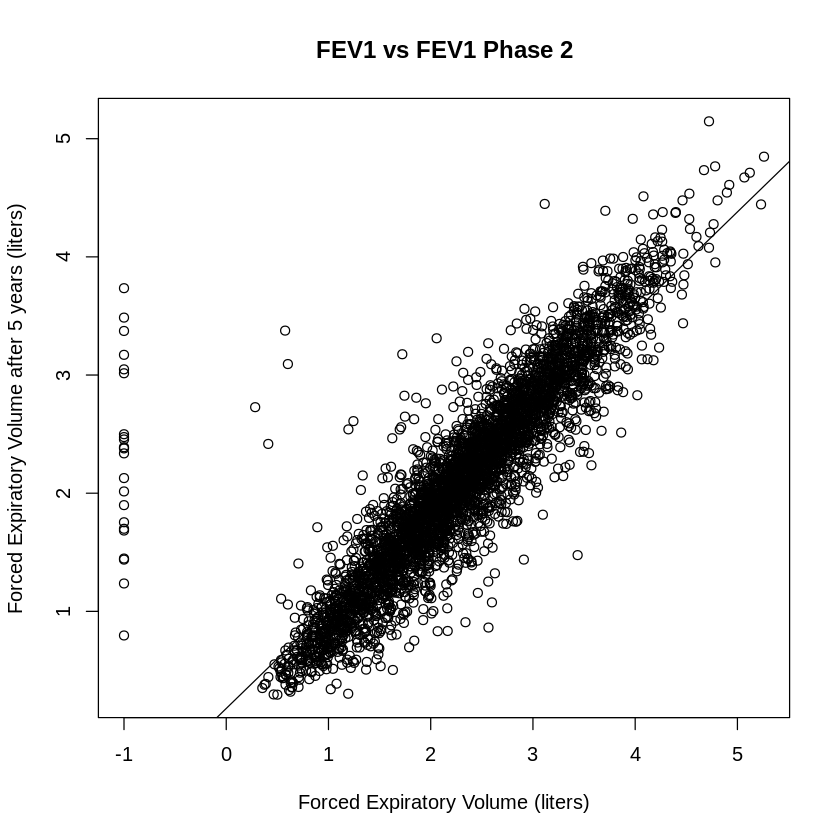

In [ ]:
# 1. Scatter plot
plot(dat1$FEV1, dat1$FEV1_phase2,
     xlab = "Forced Expiratory Volume (liters)",
     ylab = "Forced Expiratory Volume after 5 years (liters)",
     main = "FEV1 vs FEV1 Phase 2")

# 3. Linear fit
fit_linear <- lm(FEV1_phase2 ~ FEV1, data = dat1)
abline(fit_linear) # Add regression line to plot

# Summary of the fit
summary(fit_linear)

2. From the scatter plot, we see a positive linear trend. As FEV1 increases, FEV1 phase 2 also increases.

4. The adjusted R squared is 0.7897; this means that 78.97% of the variability in FEV1 phase 2 is explained by FEV1.

5. The slope is 0.840423. For every 1 liter of air a patient forcefully exhales in one second, they will likely forcefully exhale 0.840423 more air in one second five years later. This means that the breathing condition of patients are getting worse. On average, patients are losing around 0.16 liters of air after 5 years. A slope of 1.0 would mean that the breathing conditions are consistent after 5 years, and a slope greater than one would mean that their breathing conditions are improving (as they can breath more air than 5 years prior).

6. The intercept is 0.178336. A patient who forcefully exhales no air in one second will forcefully exhale 0.178336 liters of air in one second five years later. However, a patient who cannot exhale any air in one second is not possible, and if it were possible, they would not survive to see five years after. Thus, the intercept does not seem to have any real meaning aside from for predicting values.

In [ ]:
# 7. Confidence interval
confint(fit_linear)

,2.5 %,97.5 %
(Intercept),0.1451177,0.2115549
FEV1,0.8269759,0.8538708


7. From the confidence interval, we see that there is a 95% probability that the slope is between 0.827 and 0.854. Thus, it is significantly below 1. For every 1 liter of air patients forcefully exhale in one second, their ability to forcefully exhale air will decrease after 5 years by a value between 0.827 and 0.854. This means that the breathing condition of patients are declining after 5 years.

<br>

---

<br>






####<font color=red>Task 7</font> (10 points)

1. Identify two other variables in `dat1` that you think would be related to breathing health, as measured by `FEV1_phase2`. Plot these variables using scatterplots (`FEV1_phase2` on Y axis, variable 1 or variable 2 on X axis). What do you observe? Explain in complete sentences.
2. Include these two variables (categorical or numeric), along with `FEV1`, in your regression from Task 6. Show the regression summary. Keep `FEV1_phase2` as Y.
3. Using 95% confidence intervals, are the slopes for the two variables you selected significantly different from 0? Explain and interpret in complete sentences. 


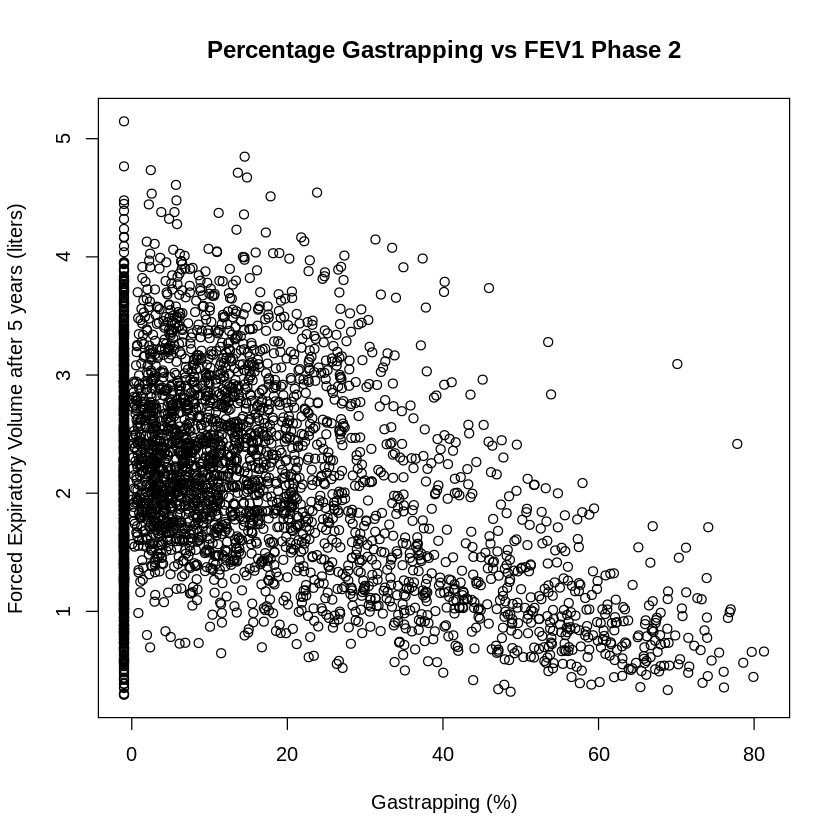

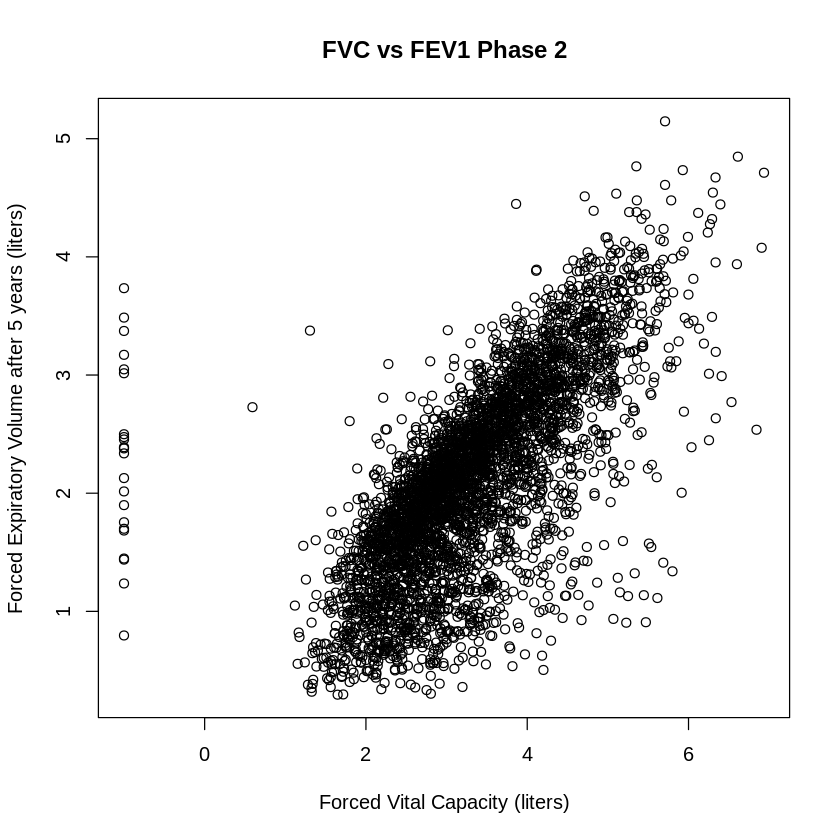

In [ ]:
# 1. Scatter plots
plot(dat1$pct_gastrapping, dat1$FEV1_phase2,
     xlab = "Gastrapping (%)",
     ylab = "Forced Expiratory Volume after 5 years (liters)",
     main = "Percentage Gastrapping vs FEV1 Phase 2")

plot(dat1$FVC, dat1$FEV1_phase2,
     xlab = "Forced Vital Capacity (liters)",
     ylab = "Forced Expiratory Volume after 5 years (liters)",
     main = "FVC vs FEV1 Phase 2")

1. (a) From our plot of Percentage Gastrapping vs FEV1 Phase 2, we see a negative trend. While a majority of the values lie between 0 and 20% gastrapping, there are still a large amount of values past it.

1. (b) From our plot of FVC vs. FEV1 Phase 2, we see a positive linear trend. A majority of the values are between 1.5 liters for FVC and 5 liters for FVC.

In [ ]:
# 2. Regression
fit <- lm(FEV1_phase2 ~ FEV1 + pct_gastrapping + FVC, data = dat1)

# Summary of the fit
summary(fit)


Call:
lm(formula = FEV1_phase2 ~ FEV1 + pct_gastrapping + FVC, data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5882 -0.1867 -0.0254  0.1533  4.2137 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.3640558  0.0207171  17.573  < 2e-16 ***
FEV1             0.9741320  0.0159747  60.980  < 2e-16 ***
pct_gastrapping -0.0013438  0.0004107  -3.272  0.00108 ** 
FVC             -0.1431752  0.0129131 -11.088  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3686 on 3996 degrees of freedom
Multiple R-squared:  0.8011,	Adjusted R-squared:  0.801 
F-statistic:  5366 on 3 and 3996 DF,  p-value: < 2.2e-16


In [ ]:
# 3. Confidence interval
confint(fit)

,2.5 %,97.5 %
(Intercept),0.323438780,0.4046728341
FEV1,0.942812603,1.0054513497
pct_gastrapping,-0.002148988,-0.0005386337
FVC,-0.168492134,-0.1178582249


3. (a) From the confidence interval, we see that there is a 95% probability that the slope for the percentage gastrapping is between -0.056 and -0.025. Thus, while it is slightly below 0, it does not seem to be significantly different than zero. For every 1 liter of air patients forcefully exhale in one second, their ability to forcefully exhale air will decrease after 5 years by a value between -0.002 and -0.001. This means that the breathing condition of patients are barely changing due to the percentage gastrapping within this model.

3. (b) From the confidence interval, we see that there is a 95% probability that the slope for forced vital capacity is between -0.168 and -0.118. Thus, it is significantly below 0. For every 1 liter of air patients forcefully exhale in one second, their ability to forcefully exhale air will decrease after 5 years by a value between -0.168 and -0.118. This means that the breathing condition of patients are declining due to increases in FVC within this model.

<br>

---

<br>






####<font color=red>Task 8</font> (5 points)

1. Using your regression model with three variables from Task 7, predict the `FEV1_phase2`.
2. Calculate the root mean squared error. Is this error large or small? Explain your answer.


```
# Hint
y <- dat1$FEV1_phase2
y_predicted <- fitted(lm(...))

# root mean squared error
rmse <- sqrt(mean((y - y_predicted)^2))
```




In [ ]:
# 1. Predict FEV1_phase2
y <- dat1$FEV1_phase2
y_predicted <- fitted(fit)

# 2. Calculating root mean squared error
rmse <- sqrt(mean((y - y_predicted)^2))
print(rmse)

[1] 0.3684011


2. Our root mean squared error is 0.3684. This seems to be relatively low, as it means that on average our predictions did not deviate extremely far from our true values. The closer to zero it is, the closer it is to our actual values.

<br>

---

<br>






####<font color=red>Task 9</font> Group Task (15 points)

1. Using the statistical/machine learning concepts from class, build a model (preferably random forest) that best predicts the `FEV1_phase2` variable in the `dat2` dataframe.
2. Submit your predictions as a csv file in the format presented in the `copd_predictions.csv` file on Canvas.

<br>
<br>

* The group with the lowest prediction error will receive 10 points extra credit on their overall project grade.
* The group with the second lowest prediction error will receive 5 points extra credit on their overall project grade.
* The group with the third lowest prediction error will receive 2 points extra credit on their overall project grade.

In [ ]:
# Load randomForest library
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
# Paritioning

# Training: randomly sample using 75% of data
n <- 0.75 * nrow(dat1)
samp <- sample(1:nrow(dat1), n)
train <- dat1[samp, ]

# Validation: remaining 25% of data
valid <- dat1[-samp, ]

In [ ]:
# Mean squared error function
mse <- function(true, pred) {
  return(mean((true - pred)^2))
}

In [ ]:
# random forest
set.seed(101)
fit <- randomForest(FEV1_phase2 ~ ., 
                    data = train,
                    importance = TRUE,

                    # hyperparameters (change to improve predictions)
                    ntree    = 200,  # number of trees to fit
                    mtry     = 10,   # number of variables to sample per tree
                    nodesize = 6,    # minimum size of terminal nodes
                    maxnodes = NULL, # maximum number of terminal nodes a tree can have
                    )

# calculate MSE on testing dataset
mse(valid$FEV1_phase2, predict(fit, newdata = valid))

[1] 0.07823179

In [ ]:
# 2. Create predictions
FEV1_phase2_predictions <- predict(fit, dat2)

# Create two-column dataframe
preds <- data.frame(sid = dat2$sid, FEV1_phase2_predictions)

# Write file to disk
write.csv(preds, 'copd_predictions.csv')